In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Now, apply your custom style sheet
plt.style.use('style_file/publication.mplstyle')

### Choose color scheme

In Matplotlib, colormaps are categorized into three types:

1. **Sequential Colormaps**: Used for representing ordered data varying in magnitude. Examples include 'viridis', 'plasma', 'inferno', and 'magma'.
    
2. **Diverging Colormaps**: Ideal for data with a central neutral point, diverging to different extremes. Examples include 'coolwarm', 'seismic', and 'PiYG'.
    
3. **Qualitative Colormaps**: Best for categorical data where each color represents a different category. Examples are 'tab10', 'tab20', 'Pastel1', and 'Set3'.

In [17]:
from cycler import cycler
import numpy as np

# Example: Generate colors from the 'magma' colormap
num_colors = 5
colors = plt.cm.magma(np.linspace(0, 1, num_colors))

# Update rcParams with generated color cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

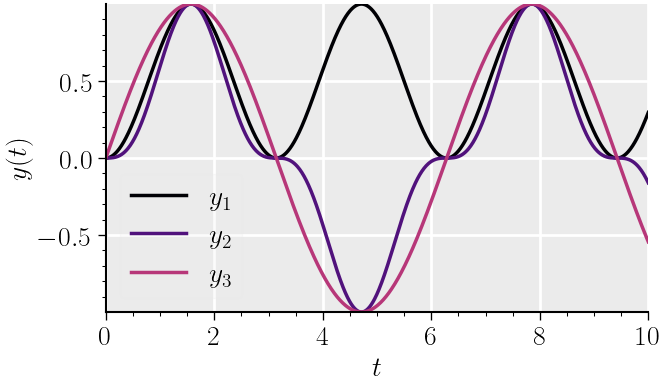

In [18]:
# For example, creating a simple plot:
x = np.linspace(0, 10, 1000)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(7,4))

ax.plot(x,y**2)
ax.plot(x,y**3)
ax.plot(x,y**1)

ax.set_xlabel("$t$")
ax.set_ylabel("$y(t)$")

# Automatically adjust the axis limits to be tight around the data
ax.autoscale(axis='both', tight=True)
plt.legend(['$y_1$','$y_2$','$y_3$'])
plt.savefig('test.png')
plt.show()
